In [1]:
%matplotlib inline
from array import array
import matplotlib.pyplot as plt
import numpy as np
import dmdd
import pylab as pl
import matplotlib.patches as patches
import matplotlib.path as path
from matplotlib.ticker import MultipleLocator, FormatStrFormatter




Object `dmdd.sigma_val` not found.


In [79]:
def expectvalues(element='xenon', Qmin=5, Qmax=50, binsize=1, v_lag=220., 
                 efficiency= dmdd.eff.efficiency_unit, 
                 exposure=2000, 
                 sigma_name='sigma_si', sigma_val=200,
                 mass=50.0, v_esc=540.0, 
                 v_rms=220.0, rho_x=0.3):
    """Returns the expected number of recoils for an associated energy.
    Auto pass everything. sigma val is cross section, sigma name is theory.
    """
    bins = (Qmax - Qmin)/binsize #number of bins graph has
    energy_lower = np.arange(Qmin, Qmax, binsize)
    energy_upper = np.arange(Qmin+binsize, Qmax+binsize, binsize)

    result = []

    for qmin, qmax in zip(energy_lower,energy_upper):
        n = dmdd.Nexpected(element, qmin, qmax, 
                           exposure, efficiency, 
                           sigma_name, sigma_val,  
                           mass=mass, v_esc=v_esc, 
                           v_lag=v_lag, v_rms=v_rms, 
                           rho_x = rho_x)
        result.append(n)
    result = np.array(result)
    # the problem I think is that v_lag has to be in the right place in dmdd.Nexpected, but it has to be a KWARG
    # if it comes after the other KWARGs. But when given a new value 

    return result 



In [80]:
def calc_xy(element='xenon', Qmin=5, Qmax=100, binsize=1, v_lag=220., 
                 efficiency= dmdd.eff.efficiency_unit, 
                 exposure=2000, 
                 sigma_name='sigma_si', sigma_val=200,
                 mass=50.0, v_esc=540.0, 
                 v_rms=220.0, rho_x=0.3): 
    """
    Calculates x and y for the graph, where x is the energy and energy bins and 
    y is the recoils per energy bin. Both x and y are arrays.
    """
    energy_lower = np.arange(Qmin, Qmax, binsize)
    energy_upper = np.arange(Qmin+binsize, Qmax+binsize, binsize)
    qmid = np.zeros(len(energy_lower))
    qmid = (energy_upper + energy_lower)/2
    for i in np.arange(len(energy_upper)): 
        qmid[i] = (energy_upper[i] + energy_lower[i])/2 

      
    data = expectvalues(element=element, Qmin=Qmin, Qmax=Qmax, exposure=exposure,
                        efficiency=efficiency, binsize=binsize,
                        v_lag=v_lag, sigma_name=sigma_name, sigma_val=sigma_val,
                        mass=mass, v_esc=v_esc, v_rms=v_rms, rho_x=rho_x) 
    data_array = np.asarray(data) #turns list into an array
    
    datalist = []
    datalist.append(qmid)
    datalist.append(data_array)
    #np.savetxt('xenondata.txt', datalist)#float argument required, not np.ndarray
    
    #datalist=np.loadtxt('xenondata.txt') 

    return datalist

In [118]:

def plot_xy(vlag_list, times, sigma_name, sigma_val, element='xenon', Qmin=5, Qmax=100, binsize=1, 
                 efficiency= dmdd.eff.efficiency_unit, 
                 exposure=2000, 
                 mass=50.0, v_esc=540.0, 
                 v_rms=220.0, rho_x=0.3, residuals=False):
    
    """
    This function needs to take a list of velocities, calcuate the x and y for each item in the list
    (though x should be same) and plot each function on the same graph. Argument Vlag_list must be a list.
    """

    x0, y0 = calc_xy(v_lag=220, element=element, Qmin=Qmin, Qmax=Qmax, binsize=binsize, 
                 efficiency= efficiency, 
                 exposure=exposure, 
                 sigma_name=sigma_name, sigma_val=sigma_val,
                 mass=mass, v_esc=v_esc, 
                 v_rms=v_rms, rho_x=rho_x)

    for v_lag, time in zip(vlag_list, times):
        plt.figure(figsize=(8,8))
        ax = plt.gca()
        ax.tick_params(width=1, length=5, labelsize=13)

        x, y = calc_xy(v_lag=v_lag, element=element, Qmin=Qmin, Qmax=Qmax, binsize=binsize, 
                 efficiency= efficiency, 
                 exposure=exposure, 
                 sigma_name=sigma_name, sigma_val=sigma_val,
                 mass=mass, v_esc=v_esc, 
                 v_rms=v_rms, rho_x=rho_x)

        
        plt.xlabel('Energy [keV]', fontsize = 13)
        plt.title('Dark Matter Collision Spectrum for Spin Independent', fontsize = 15)
        plt.xlim((0,80))
            
        plt.plot(x, y-y0, label = r'$%i\/\ \mathrm{  km/s} $' % (v_lag), color='blue')
        plt.ylabel('Number of Residual Expected Recoil Events', fontsize = 13)
        plt.xlim((0,80))
        plt.ylim((-4, 4))


            
        plt.legend(title = 'Relative Velocity of Dark Matter Particle')        
        fig = plt.gcf()

            
        #(:.0f)
        filename = 'GifSI_vlag_{}_r{}.png'.format(sigma_name, time, residuals)
        
        fig.savefig(filename)
        plt.close(fig)        
        
        
    
        #the following just changes the colors and axis of graph
        #ml = MultipleLocator(5)
        #m2 = MultipleLocator(25)
        #plt.axes().xaxis.set_minor_locator(ml)
        #plt.axes().yaxis.set_major_locator(m2)
        #plt.axes().yaxis.set_minor_locator(ml)

        

        #plt.show()
  

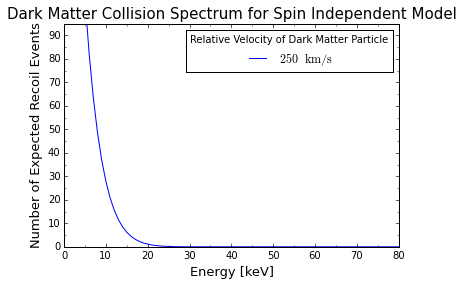

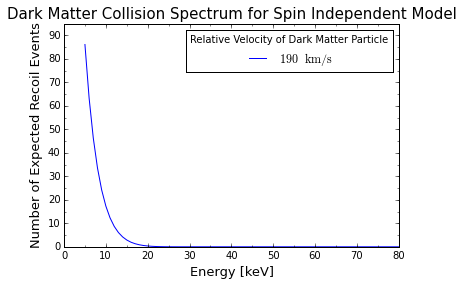

In [5]:
#plot_xy([220,], mass = 50, ymax = None)
#plot_xy([220,], mass=10, ymax = None)
#plot_xy([220,], mass=80)
#plot_xy([220,], mass=100)
#plot_xy([220,], sigma_name='sigma_si_massless', sigma_val = 500, mass= 50, ymax= None)

In [6]:
def calc_vlag(t, v_sun = 220., v_earth= 30.):
    """Calculates the combined velocity of the Sun and the Earth's movement around the galactic center
    as a function of days (t). t = 0 corresponds to the maximum speed v = 250. Can take a single time or multiple times.
    If given multiple times, will return as an array of velocities.
    """
    
    v_lag = 220 + 30*np.sin((2*np.pi*np.asarray(t))/(365))
    return v_lag
    

In [93]:
def plot_Ntot(tbins=200, mass=50, Qmin=1 , Qmax=51):
    ts = np.linspace(0, 365, tbins)
    lux = dmdd.Experiment('LUX2014', 'xenon', 5, 23, 27.612, dmdd.eff.efficiency_Xe)
    sigma_val_SI= lux.sigma_limit(mass=mass, sigma_name='sigma_si')
    sigma_val_An= lux.sigma_limit(mass=mass, sigma_name='sigma_anapole')
    NtotS = []
    NtotA = []
    for i,t in enumerate(ts):
        v = calc_vlag(t)
        # = calc_xy(v_lag = v, sigma_name = 'sigma_si', sigma_val = sigma_val_SI, mass=mass)
        #x, yA = calc_xy(v_lag = v, sigma_name = 'sigma_anapole', sigma_val = sigma_val_An, mass=mass)
        #NtotS.append(sum(yS))
        #NtotA.append(sum(yA))
        #pass the single time bin (ex 2000 kgyrs/200 time bins)
        yS = dmdd.Nexpected(element='xenon', Qmin=Qmin, Qmax=Qmax, exposure= 2000./tbins, 
                            efficiency=dmdd.eff.efficiency_Xe,
                            sigma_name='sigma_si', sigma_val=sigma_val_SI, mass=mass, v_lag= v)
        yA = dmdd.Nexpected(element='xenon', Qmin=Qmin, Qmax=Qmax, exposure= 2000./tbins, 
                            efficiency=dmdd.eff.efficiency_Xe,
                            sigma_name='sigma_anapole', sigma_val=sigma_val_An, mass=mass, v_lag= v)
        yS0 = dmdd.Nexpected(element='xenon', Qmin=Qmin, Qmax=Qmax, exposure= 2000./tbins, 
                             efficiency=dmdd.eff.efficiency_Xe,
                            sigma_name='sigma_si', sigma_val=sigma_val_SI, mass=mass, v_lag= 220) 
        yA0 = dmdd.Nexpected(element='xenon', Qmin=Qmin, Qmax=Qmax, exposure= 2000./tbins, 
                             efficiency=dmdd.eff.efficiency_Xe,
                            sigma_name='sigma_anapole', sigma_val=sigma_val_An, mass=mass, v_lag= 220)         
        NtotS.append(yS)
        NtotA.append(yA)

    plt.figure(figsize=(8,8))
        
    NtotS = np.array(NtotS)
    NtotA = np.array(NtotA)
    ax = plt.gca()
    ax.tick_params(width=1, length=8, labelsize=15)
    plt.xlabel('Time [Days]', fontsize = 15)
    plt.ylabel('Percent Change of Total Events', fontsize = 15)   
    pl.plot(ts, (NtotS - yS0)/NtotS.mean()*100., label = 'Spin Independent')
    pl.plot(ts, (NtotA - yA0)/NtotA.mean()*100., label = 'Anapole', c='red')
    plt.legend(title = 'Model', loc=0) #0


In [56]:
dmdd.Nexpected?

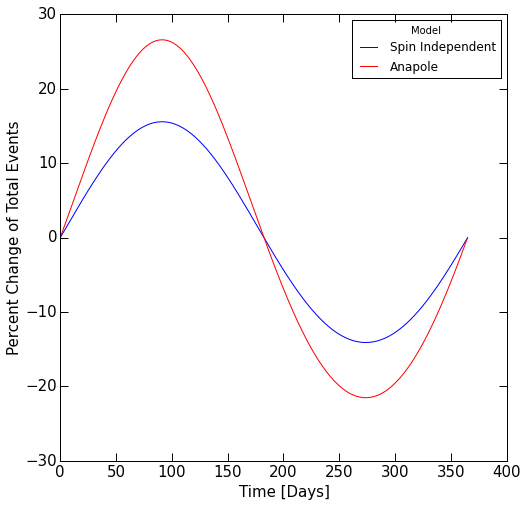

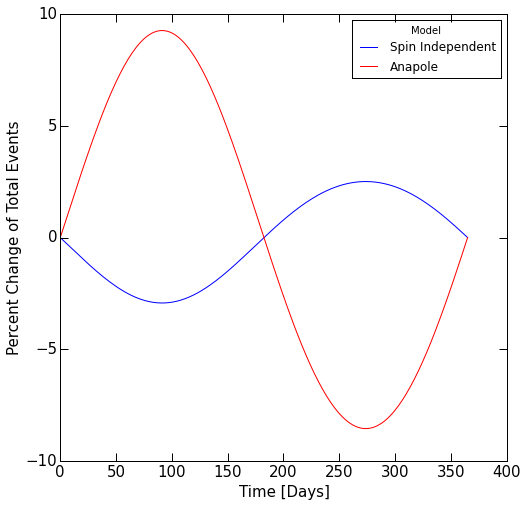

In [21]:
#plot_Ntot(200, mass=8) #absolute lowest energy graphs will generate for
plot_Ntot(200, mass=10)
#plot_Ntot(200, mass=50)
#plot_Ntot(200, mass=70)
plot_Ntot(200, mass=100)
#plot_Ntot(200, mass=200)
#plot_Ntot(200, mass=1000)
#plot_Ntot(200, mass=10000) #SI model gets close to having same amplitude here

In [119]:
def modelplot(t1, t2, plotnumber = 10, element='xenon', Qmin=5, Qmax=100, binsize=1, v_lag=220., 
                 efficiency= dmdd.eff.efficiency_unit, 
                 exposure=2000., 
                 sigma_name='sigma_anapole', sigma_val=44.25,
                 mass=50.0, v_esc=540.0, 
                 v_rms=220.0, rho_x=0.3, residuals=False):
    
    times = np.linspace(t1, t2, plotnumber)
    #print times
    #linspace creates an array from the two given numbers 
    #including the first and the last
    #and splits them evenly based on the third number
    
    relative_v = calc_vlag(times)
    #exposure = exposure / plotnumber
    #print relative_v
    #print type(times)
    #the array from times is boolean?, so we need to make it a list to pass to plot_xy

    plot_xy(vlag_list = relative_v.tolist(), times=times, element=element, Qmin=Qmin, sigma_name=sigma_name,
                        Qmax=Qmax, exposure=exposure, sigma_val=sigma_val,
                        efficiency=efficiency, binsize=binsize,
                        mass=mass, v_esc=v_esc, v_rms=v_rms, rho_x=rho_x, residuals=residuals)


In [120]:
modelplot(0, 365, sigma_name='sigma_si', sigma_val=75.50, plotnumber=200, residuals=True)

In [76]:
def dayplot(t1, t2, element='xenon', Qmin=5., Qmax=100., binsize=10, v_lag=220., 
                 efficiency= dmdd.eff.efficiency_unit, 
                 exposure=2000, 
                 sigma_name='sigma_si', sigma_val=200,
                 mass=50.0, v_esc=540.0, 
                 v_rms=220.0, rho_x=0.3):
    plt.figure(figsize=(10,10))

    days = np.linspace(t1, t2, binsize)
    #print days
    #this array gives the day bins for the graph
    vdays = calc_vlag(days)
    #print vdays
    #calculates the different velocities for each day
    #plt.scatter(days, vdays - 220)
    
    n_expect0 = expectvalues(v_lag = 220)
    #print n_expect0
    n0 = sum(n_expect0)
    print n0
    
    n_list = []
    
    for v_lag in vdays:
        n_expect = expectvalues(v_lag = v_lag)
        n_sum = sum(n_expect)
        #print n_sum
        n_list.append(n_sum)
    #print n_list
    #n_list = np.array(n_list)
    #print n_list
    #plt.scatter(days, n_sum)
    plt.title('Residual Dark Matter Collisions Over Time', fontsize = 15)
    plt.xlabel('Time [Days]', fontsize = 13)
    plt.ylabel('Average Number of Residual Recoil Events', fontsize = 13)
    plt.xlim((0,400))
    plt.ylim((-40, 40))
    
    #no difference between sigma_anapole and sigma_si


    
    plt.plot(days, n_list - n0)
    plt.savefig('n_events_vs_days.png')

In [10]:
def duoplot(Qmin, Qmax):


    """
    This function returns both the SI and Anapole models for an energy range.
    """

    x1, y1 = calc_xy(element='xenon', Qmin=Qmin, Qmax=Qmax, binsize=1, v_lag=220., 
                 efficiency= dmdd.eff.efficiency_unit, 
                 exposure=2000, 
                 sigma_name='sigma_si', sigma_val=75.50,
                 mass=50.0, v_esc=540.0, 
                 v_rms=220.0, rho_x=0.3)
    x2, y2 = calc_xy(element='xenon', Qmin=Qmin, Qmax=Qmax, binsize=1, v_lag=220., 
                 efficiency= dmdd.eff.efficiency_unit, 
                 exposure=2000, 
                 sigma_name='sigma_anapole', sigma_val=44.25,
                 mass=50.0, v_esc=540.0, 
                 v_rms=220.0, rho_x=0.3)
    plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.tick_params(width=1, length=8, labelsize=15)
    plt.title('Model Comparison for Dark Matter Collisions', fontsize = 20)
    plt.xlabel('Energy [keV]', fontsize = 15)
    plt.ylabel('Number of Recoil Events', fontsize = 15)
    plt.plot(x2, y2, label = 'Anapole', linewidth =3.0, color='red')
    plt.plot(x1, y1, 'b--', label = 'Spin Independent', color='blue', linewidth =3.0)
    plt.legend(title = 'Model')
    ml = MultipleLocator(5)
    m2 = MultipleLocator(10)
    plt.axes().xaxis.set_minor_locator(ml)
    plt.axes().xaxis.set_major_locator(m2)
    plt.axes().yaxis.set_minor_locator(ml)
    plt.savefig('SI_vs_Anapole.png')
                

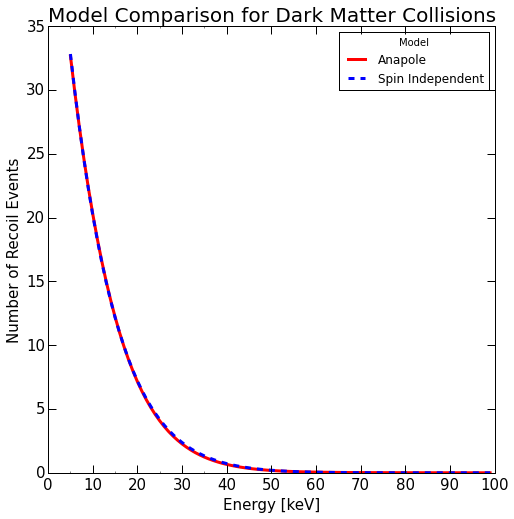

In [13]:
duoplot(5, 100)

In [22]:
dmdd.Nexpected(element='xenon', Qmin=5, Qmax=6, v_lag=220., 
                 efficiency= dmdd.eff.efficiency_unit, 
                 exposure=2000, 
                 sigma_name='sigma_si', sigma_val=200,
                 mass=50.0, v_esc=540.0, 
                 v_rms=220.0, rho_x=0.3)

86.97772843091985

In [23]:
dmdd.Nexpected(element='xenon', Qmin=5, Qmax=6, v_lag=220., 
                 efficiency= dmdd.eff.efficiency_unit, 
                 exposure=2000, 
                 sigma_name='sigma_anapole', sigma_val=200,
                 mass=50.0, v_esc=540.0, 
                 v_rms=220.0, rho_x=0.3)

147.72865832674265

In [11]:
def vlag_plot(t=np.linspace(0, 365, 200), v_sun = 220., v_earth= 30.):
    """Graphs the combined velocity of the Sun and the Earth's movement around the galactic center
    as a function of days (t). t = 0 corresponds to the maximum speed v = 250. Can take a single time or multiple times.
    If given multiple times, will return as an array of velocities.
    """
    plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.tick_params(width=1, length=8, labelsize=15)
    ml = MultipleLocator(5)
    m2 = MultipleLocator(10)
    #plt.axes().xaxis.set_minor_locator(ml)
    plt.axes().yaxis.set_major_locator(m2)
    plt.axes().yaxis.set_minor_locator(ml)
   
    v_lag = 220 + 30*np.sin((2*np.pi*np.asarray(t))/(365))
    plt.plot(t, v_lag, linewidth=2)
    plt.title('Annual Modulation of Earth', fontsize = 20)
    plt.xlabel('Time [Days]', fontsize = 15)
    plt.ylabel('Relative Velocity of Earth [km/s]', fontsize = 15)   
    plt.savefig('vlag_earth.png')
    #return v_lag
    

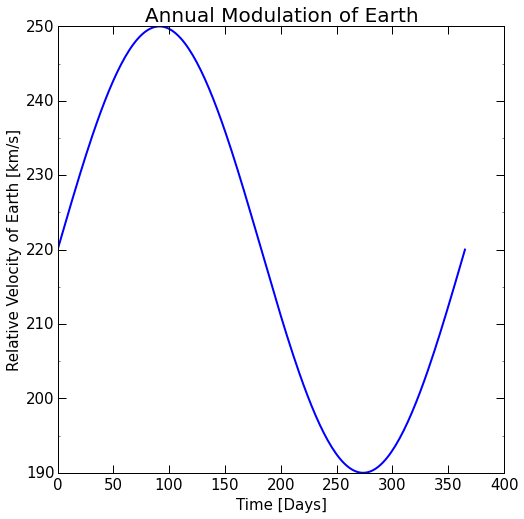

In [93]:
vlag_plot()